In [28]:
import os
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GroupKFold
import lightgbm as lgb 
from sklearn.metrics import root_mean_squared_error
import random
random.seed(42)
import pickle

#### Import Data and Model

In [29]:
# load data

full_data = pd.read_csv('full_data.csv')
sub = pd.read_csv('SampleSubmission.csv')

# filter the data 
train = full_data[full_data['pm2_5']!= -1]
test = full_data[full_data['pm2_5']== -1]

selected_features = ['site_id', 'site_latitude', 'site_longitude', 'city', 'country', 'hour', 'sulphurdioxide_so2_column_number_density', 'sulphurdioxide_so2_column_number_density_amf', 'sulphurdioxide_so2_slant_column_number_density', 'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle', 'sulphurdioxide_sensor_zenith_angle', 'sulphurdioxide_solar_azimuth_angle', 'sulphurdioxide_solar_zenith_angle', 'sulphurdioxide_so2_column_number_density_15km', 'month', 'carbonmonoxide_co_column_number_density', 'carbonmonoxide_h2o_column_number_density', 'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude', 'carbonmonoxide_sensor_azimuth_angle', 'carbonmonoxide_sensor_zenith_angle', 'carbonmonoxide_solar_azimuth_angle', 'carbonmonoxide_solar_zenith_angle', 'nitrogendioxide_no2_column_number_density', 'nitrogendioxide_tropospheric_no2_column_number_density', 'nitrogendioxide_stratospheric_no2_column_number_density', 'nitrogendioxide_no2_slant_column_number_density', 'nitrogendioxide_tropopause_pressure', 'nitrogendioxide_absorbing_aerosol_index', 'nitrogendioxide_cloud_fraction', 'nitrogendioxide_sensor_altitude', 'nitrogendioxide_sensor_azimuth_angle', 'nitrogendioxide_sensor_zenith_angle', 'nitrogendioxide_solar_azimuth_angle', 'nitrogendioxide_solar_zenith_angle', 'formaldehyde_tropospheric_hcho_column_number_density', 'formaldehyde_tropospheric_hcho_column_number_density_amf', 'formaldehyde_hcho_slant_column_number_density', 'formaldehyde_cloud_fraction', 'formaldehyde_solar_zenith_angle', 'formaldehyde_solar_azimuth_angle', 'formaldehyde_sensor_zenith_angle', 'formaldehyde_sensor_azimuth_angle', 'uvaerosolindex_absorbing_aerosol_index', 'uvaerosolindex_sensor_altitude', 'uvaerosolindex_sensor_azimuth_angle', 'uvaerosolindex_sensor_zenith_angle', 'uvaerosolindex_solar_azimuth_angle', 'uvaerosolindex_solar_zenith_angle', 'ozone_o3_column_number_density', 'ozone_o3_column_number_density_amf', 'ozone_o3_slant_column_number_density', 'ozone_o3_effective_temperature', 'ozone_cloud_fraction', 'ozone_sensor_azimuth_angle', 'ozone_sensor_zenith_angle', 'ozone_solar_azimuth_angle', 'ozone_solar_zenith_angle', 'cloud_cloud_fraction', 'cloud_cloud_top_pressure', 'cloud_cloud_top_height', 'cloud_cloud_base_pressure', 'cloud_cloud_base_height', 'cloud_cloud_optical_depth', 'cloud_surface_albedo', 'cloud_sensor_azimuth_angle', 'cloud_sensor_zenith_angle', 'cloud_solar_azimuth_angle', 'cloud_solar_zenith_angle', 'day_of_year', 'year', 'quarter', 'day_sin', 'day_cos']



# load model

with open('lightgbm_model.pkl', 'rb') as f:
    model = pickle.load(f)

#### Feature Importance

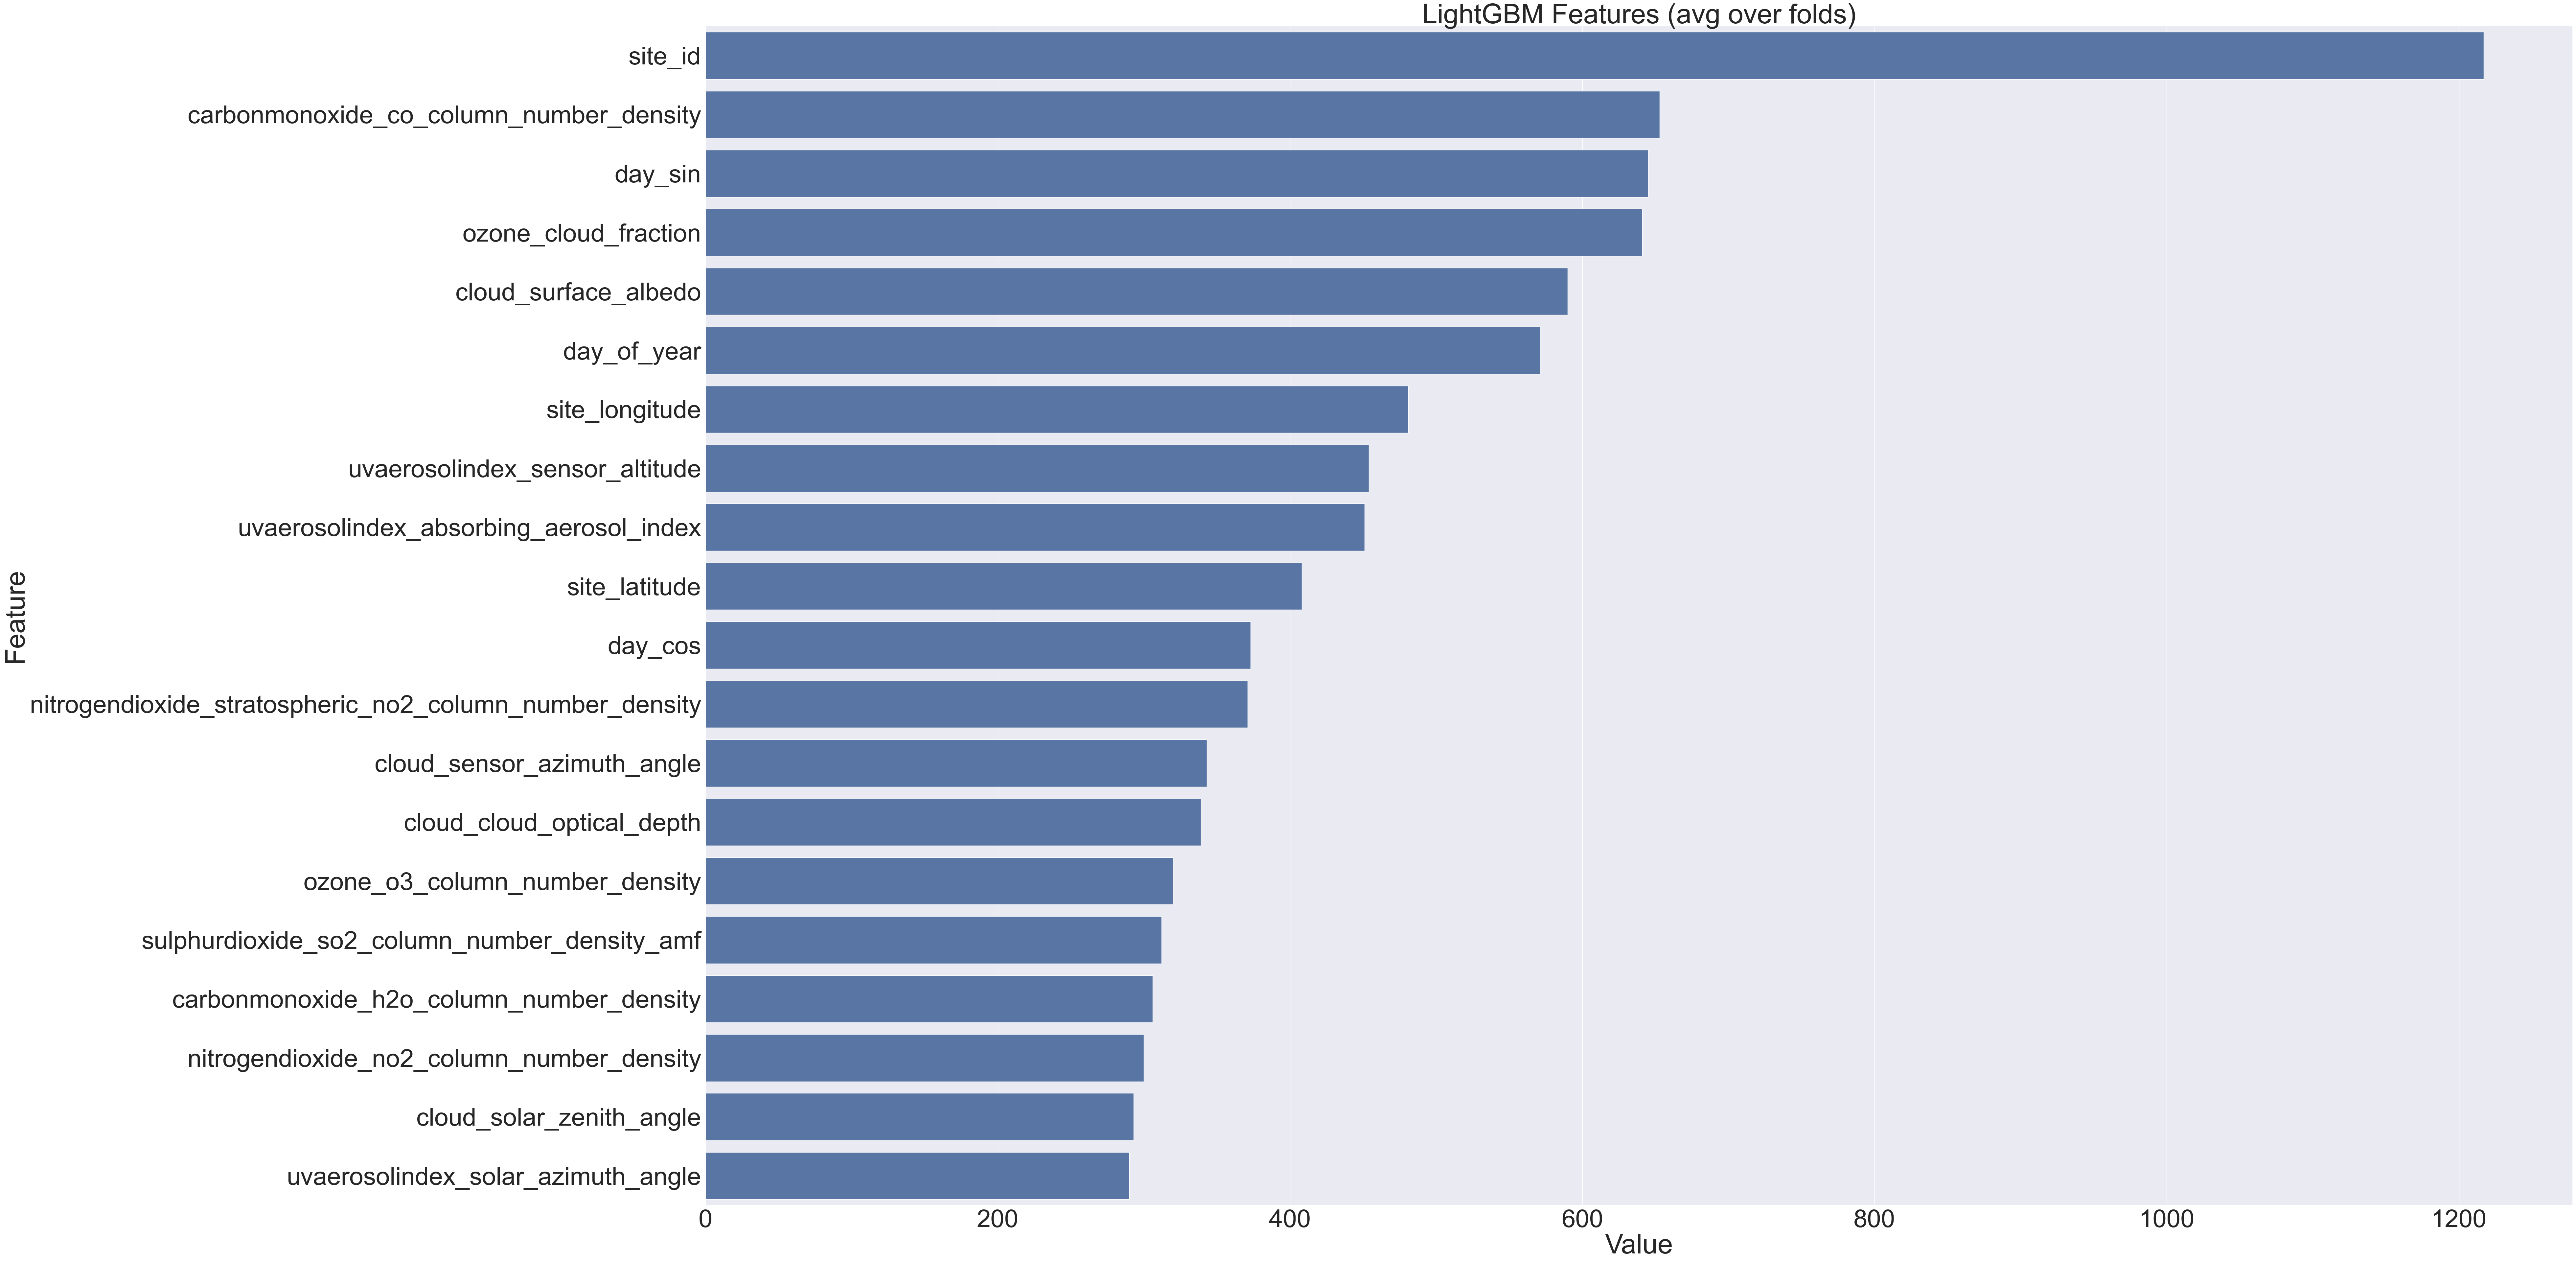

In [30]:
def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(80, 40))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')   
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()


plotImp(model, train[selected_features], num=20)

#### Further Feature Engineering

In [18]:
# Cyclical feature

full_data['day_sin'] = np.sin(2 * np.pi * full_data['day_of_year'] / 365)
full_data['day_cos'] = np.cos(2 * np.pi * full_data['day_of_year'] / 365)